In [1]:
import re      #regular expression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = open('WhatsApp Chat with Classroom.txt','r',encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(type(data))

<class 'str'>


In [5]:
print(data)

12/2/21, 1:14 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
1/22/22, 6:37 PM - +91 83681 25463 updated the message timer. New messages will disappear from this chat 24 hours after they're sent, except when kept.
1/23/22, 7:57 PM - +91 93062 05958 joined using this group's invite link
1/27/22, 10:25 PM - +91 93105 69317 updated the message timer. New messages will disappear from this chat 7 days after they're sent, except when kept.
1/27/22, 10:25 PM - +91 93105 69317 turned off disappearing messages.
1/27/22, 10:25 PM - +91 83681 25463 updated the message timer. New messages will disappear from this chat 24 hours after they're sent, except when kept.
1/27/22, 10:25 PM - Nikil CSDS updated the message timer. New messages will disappear from this chat 7 days after they're sent, except when kept.
1/27/22, 10:26 PM - Nikil CSDS turned off disappearing messages.
1/27/22, 10:26 PM - +91 97736 2

In [6]:
pattern = '\d{1,2}\/\d{1,2}\/\d{2},\s\d{1,2}:\d{2}\s(?:AM|PM)'

In [7]:
messages = re.split(pattern,data)[1:]
messages

[' - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 " - +91 83681 25463 updated the message timer. New messages will disappear from this chat 24 hours after they're sent, except when kept.\n",
 " - +91 93062 05958 joined using this group's invite link\n",
 " - +91 93105 69317 updated the message timer. New messages will disappear from this chat 7 days after they're sent, except when kept.\n",
 ' - +91 93105 69317 turned off disappearing messages.\n',
 " - +91 83681 25463 updated the message timer. New messages will disappear from this chat 24 hours after they're sent, except when kept.\n",
 " - Nikil CSDS updated the message timer. New messages will disappear from this chat 7 days after they're sent, except when kept.\n",
 ' - Nikil CSDS turned off disappearing messages.\n',
 ' - +91 97736 22194: Mujhe bhi khelna hai\n',
 ' - +91 97736 22194: 🤧🤧🤧\n',
 ' - +91 83681 25463: 🤧🤧🤧🤧🤧🤧\n',
 " - +

In [8]:
dates = re.findall(pattern,data)
dates

['12/2/21, 1:14\u202fPM',
 '1/22/22, 6:37\u202fPM',
 '1/23/22, 7:57\u202fPM',
 '1/27/22, 10:25\u202fPM',
 '1/27/22, 10:25\u202fPM',
 '1/27/22, 10:25\u202fPM',
 '1/27/22, 10:25\u202fPM',
 '1/27/22, 10:26\u202fPM',
 '1/27/22, 10:26\u202fPM',
 '1/27/22, 10:26\u202fPM',
 '1/27/22, 10:26\u202fPM',
 '1/27/22, 10:26\u202fPM',
 '1/27/22, 10:27\u202fPM',
 '1/27/22, 10:27\u202fPM',
 '1/27/22, 10:27\u202fPM',
 '1/27/22, 10:34\u202fPM',
 '1/29/22, 5:04\u202fPM',
 '1/29/22, 5:23\u202fPM',
 '1/30/22, 6:32\u202fPM',
 '1/30/22, 8:51\u202fPM',
 '1/30/22, 10:56\u202fPM',
 '1/31/22, 8:40\u202fAM',
 '1/31/22, 8:35\u202fPM',
 '1/31/22, 9:10\u202fPM',
 '1/31/22, 9:33\u202fPM',
 '2/1/22, 8:59\u202fAM',
 '2/1/22, 10:23\u202fAM',
 '2/3/22, 8:58\u202fAM',
 '2/3/22, 10:26\u202fAM',
 '2/3/22, 10:33\u202fAM',
 '2/4/22, 9:01\u202fAM',
 '2/4/22, 9:01\u202fAM',
 '2/4/22, 9:04\u202fAM',
 '2/4/22, 12:39\u202fPM',
 '2/5/22, 7:16\u202fAM',
 '2/5/22, 4:48\u202fPM',
 '2/6/22, 5:14\u202fPM',
 '2/6/22, 6:38\u202fPM',
 '2/9/2

In [9]:
df = pd.DataFrame({'user_message':messages,'message_date':dates})
#convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %I:%M %p')

df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()

,user_message,date
0,- Messages and calls are end-to-end encrypted...,2021-12-02 13:14:00
1,- +91 83681 25463 updated the message timer. ...,2022-01-22 18:37:00
2,- +91 93062 05958 joined using this group's i...,2022-01-23 19:57:00
3,- +91 93105 69317 updated the message timer. ...,2022-01-27 22:25:00
4,- +91 93105 69317 turned off disappearing mes...,2022-01-27 22:25:00


In [10]:
df.shape

(37556, 2)

In [11]:
#separate name and messages
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])


df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)


In [12]:
df.head()

,date,user,message
0,2021-12-02 13:14:00,group_notification,- Messages and calls are end-to-end encrypted...
1,2022-01-22 18:37:00,group_notification,- +91 83681 25463 updated the message timer. ...
2,2022-01-23 19:57:00,group_notification,- +91 93062 05958 joined using this group's i...
3,2022-01-27 22:25:00,group_notification,- +91 93105 69317 updated the message timer. ...
4,2022-01-27 22:25:00,group_notification,- +91 93105 69317 turned off disappearing mes...


In [13]:
df['year'] = df['date'].dt.year

In [14]:
df.head()

,date,user,message,year
0,2021-12-02 13:14:00,group_notification,- Messages and calls are end-to-end encrypted...,2021
1,2022-01-22 18:37:00,group_notification,- +91 83681 25463 updated the message timer. ...,2022
2,2022-01-23 19:57:00,group_notification,- +91 93062 05958 joined using this group's i...,2022
3,2022-01-27 22:25:00,group_notification,- +91 93105 69317 updated the message timer. ...,2022
4,2022-01-27 22:25:00,group_notification,- +91 93105 69317 turned off disappearing mes...,2022


In [15]:
df['month'] = df['date'].dt.month_name()

In [16]:
df.head()

,date,user,message,year,month
0,2021-12-02 13:14:00,group_notification,- Messages and calls are end-to-end encrypted...,2021,December
1,2022-01-22 18:37:00,group_notification,- +91 83681 25463 updated the message timer. ...,2022,January
2,2022-01-23 19:57:00,group_notification,- +91 93062 05958 joined using this group's i...,2022,January
3,2022-01-27 22:25:00,group_notification,- +91 93105 69317 updated the message timer. ...,2022,January
4,2022-01-27 22:25:00,group_notification,- +91 93105 69317 turned off disappearing mes...,2022,January


In [17]:
df['day'] = df['date'].dt.day

In [18]:
df

,date,user,message,year,month,day
0,2021-12-02 13:14:00,group_notification,- Messages and calls are end-to-end encrypted...,2021,December,2
1,2022-01-22 18:37:00,group_notification,- +91 83681 25463 updated the message timer. ...,2022,January,22
2,2022-01-23 19:57:00,group_notification,- +91 93062 05958 joined using this group's i...,2022,January,23
3,2022-01-27 22:25:00,group_notification,- +91 93105 69317 updated the message timer. ...,2022,January,27
4,2022-01-27 22:25:00,group_notification,- +91 93105 69317 turned off disappearing mes...,2022,January,27
...,...,...,...,...,...,...
37551,2024-05-08 18:48:00,- Manya CEDS,Itni jaldi disown krdiya clg walo ne 🥲\n,2024,May,8
37552,2024-05-08 19:10:00,- Navya CSDS,Nhi yrr meri toh shi h\n,2024,May,8
37553,2024-05-08 21:51:00,- Devmuni CEDS,<Media omitted>\n,2024,May,8
37554,2024-05-08 21:53:00,- Vinay CSDS,Bhai vo dukhi isliye hai kyuki in hand salary ...,2024,May,8


In [19]:
df.head()

,date,user,message,year,month,day
0,2021-12-02 13:14:00,group_notification,- Messages and calls are end-to-end encrypted...,2021,December,2
1,2022-01-22 18:37:00,group_notification,- +91 83681 25463 updated the message timer. ...,2022,January,22
2,2022-01-23 19:57:00,group_notification,- +91 93062 05958 joined using this group's i...,2022,January,23
3,2022-01-27 22:25:00,group_notification,- +91 93105 69317 updated the message timer. ...,2022,January,27
4,2022-01-27 22:25:00,group_notification,- +91 93105 69317 turned off disappearing mes...,2022,January,27


In [20]:
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [21]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2021-12-02 13:14:00,group_notification,- Messages and calls are end-to-end encrypted...,2021,December,2,13,14
1,2022-01-22 18:37:00,group_notification,- +91 83681 25463 updated the message timer. ...,2022,January,22,18,37
2,2022-01-23 19:57:00,group_notification,- +91 93062 05958 joined using this group's i...,2022,January,23,19,57
3,2022-01-27 22:25:00,group_notification,- +91 93105 69317 updated the message timer. ...,2022,January,27,22,25
4,2022-01-27 22:25:00,group_notification,- +91 93105 69317 turned off disappearing mes...,2022,January,27,22,25


In [22]:
words= []
for message in df['message']:
    words.extend(message.split())

In [23]:
len(words)

196474

In [24]:
from urlextract import URLExtract

extractor  = URLExtract()
urls = extractor.find_urls("hi iat is himanshu.com as hmnshuu.vercel.app")
urls

['himanshu.com', 'hmnshuu.vercel.app']

In [25]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [26]:
len(links)

411

In [27]:
X = df['user'].value_counts()

In [28]:
name = X.index
count = X.values

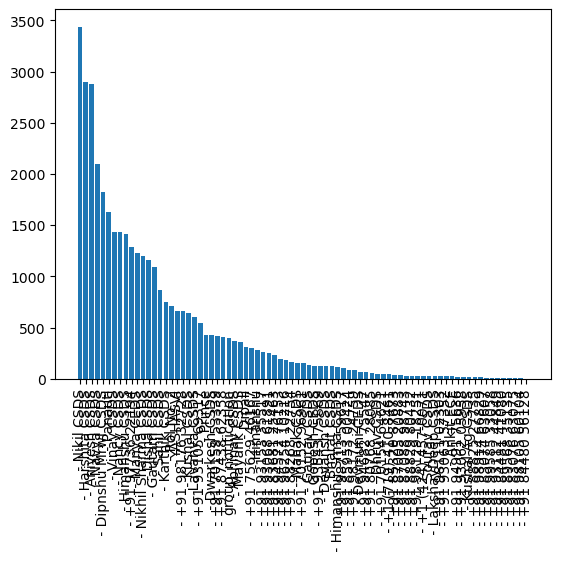

In [29]:
plt.bar(name,count)
plt.xticks(rotation = 'vertical')
plt.show()

In [30]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns ={'index':'name','user':'percent'})

,percent,count
0,- Nikil CSDS,9.15
1,- Harshita CSDS,7.72
2,- Anivesh CSDS,7.67
3,- Navya CSDS,5.59
4,- Dipnshu Mrwl CSDS,4.87
...,...,...
74,- +91 84481 41080,0.01
75,- +91 89568 35135,0.01
76,- +91 83076 63075,0.01
77,- +91 98105 60104,0.01


In [31]:
words = []
for message in df['message']:
    words.extend(message.split())

In [32]:
words

['-',
 'Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 '-',
 '+91',
 '83681',
 '25463',
 'updated',
 'the',
 'message',
 'timer.',
 'New',
 'messages',
 'will',
 'disappear',
 'from',
 'this',
 'chat',
 '24',
 'hours',
 'after',
 "they're",
 'sent,',
 'except',
 'when',
 'kept.',
 '-',
 '+91',
 '93062',
 '05958',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '-',
 '+91',
 '93105',
 '69317',
 'updated',
 'the',
 'message',
 'timer.',
 'New',
 'messages',
 'will',
 'disappear',
 'from',
 'this',
 'chat',
 '7',
 'days',
 'after',
 "they're",
 'sent,',
 'except',
 'when',
 'kept.',
 '-',
 '+91',
 '93105',
 '69317',
 'turned',
 'off',
 'disappearing',
 'messages.',
 '-',
 '+91',
 '83681',
 '25463',
 'updated',
 'the',
 'message',
 'timer.',
 'New',
 'messages',
 'will',
 'disappear',
 

In [33]:
from collections import Counter
Counter(words)

Counter({'<Media': 7869,
         'omitted>': 7869,
         'h': 3825,
         'to': 2497,
         'hai': 1898,
         'ki': 1773,
         'nhi': 1640,
         'bhi': 1612,
         'hi': 1317,
         'message': 1313,
         'was': 1281,
         'This': 1243,
         'deleted': 1213,
         'se': 1187,
         'ka': 1144,
         'toh': 1134,
         'Happy': 1025,
         'kya': 990,
         'ho': 945,
         'ko': 939,
         'class': 927,
         'me': 852,
         'na': 788,
         'ni': 782,
         'the': 755,
         'bhai': 741,
         'tha': 736,
         'Bhai': 721,
         'ke': 714,
         'k': 692,
         'birthday': 688,
         'koi': 626,
         'm': 604,
         'ye': 589,
         'kr': 585,
         'and': 571,
         '-': 541,
         '++': 507,
         'mein': 504,
         'ne': 494,
         'of': 491,
         'is': 476,
         'rha': 432,
         '+1': 423,
         'with': 418,
         '😂😂': 417,
         'mam'

In [34]:
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,<Media,7869
1,omitted>,7869
2,h,3825
3,to,2497
4,hai,1898
5,ki,1773
6,nhi,1640
7,bhi,1612
8,hi,1317
9,message,1313


In [39]:
#remove grp noti msgs
#remove media omited
#remove stopwords
temp = df[df['user'] !='group_notification']
temp[temp['message'] != '<Media omitted>\n']

,date,user,message,year,month,day,hour,minute
8,2022-01-27 22:26:00,- +91 97736 22194,Mujhe bhi khelna hai\n,2022,January,27,22,26
9,2022-01-27 22:26:00,- +91 97736 22194,🤧🤧🤧\n,2022,January,27,22,26
10,2022-01-27 22:26:00,- +91 83681 25463,🤧🤧🤧🤧🤧🤧\n,2022,January,27,22,26
13,2022-01-27 22:27:00,- +91 97736 22194,Itne sundar sai emoji ka galat use kar raha hai\n,2022,January,27,22,27
14,2022-01-27 22:27:00,- +91 97736 22194,🤧🤧🤧\n,2022,January,27,22,27
...,...,...,...,...,...,...,...,...
37550,2024-05-08 18:46:00,- Rol No. 2,Kisi ki college I'd disabled dikha rhi h kya?\n,2024,May,8,18,46
37551,2024-05-08 18:48:00,- Manya CEDS,Itni jaldi disown krdiya clg walo ne 🥲\n,2024,May,8,18,48
37552,2024-05-08 19:10:00,- Navya CSDS,Nhi yrr meri toh shi h\n,2024,May,8,19,10
37554,2024-05-08 21:53:00,- Vinay CSDS,Bhai vo dukhi isliye hai kyuki in hand salary ...,2024,May,8,21,53


In [43]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
<Media omitted>\n
+1
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com


In [44]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
    # words.extend(message.split())

In [45]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,<media,7869
1,message,1290
2,deleted,1213
3,happy,1073
4,class,1057
5,birthday,1020
6,mam,613
7,++,507
8,lab,465
9,😂😂,417


In [49]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
<Media omitted>\n
<Media
deleted
message
<media
++
@

+1
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
cha

In [50]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
    # words.extend(message.split())

In [51]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,happy,1073
1,class,1057
2,birthday,1020
3,mam,613
4,lab,465
5,😂😂,417
6,baat,389
7,online,387
8,😂,383
9,yrr,375


In [52]:
pip install emoji


   ---------------------------------------- 0.0/433.8 kB ? eta -:--:--
    --------------------------------------- 10.2/433.8 kB ? eta -:--:--
   --- ----------------------------------- 41.0/433.8 kB 991.0 kB/s eta 0:00:01
   -------------------------- ------------- 286.7/433.8 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 433.8/433.8 kB 3.9 MB/s eta 0:00:00


In [53]:
import emoji

In [58]:
pip install emoji~=1.6.3

     ---------------------------------------- 0.0/174.2 kB ? eta -:--:--
     -- ------------------------------------- 10.2/174.2 kB ? eta -:--:--
     ------ ------------------------------ 30.7/174.2 kB 435.7 kB/s eta 0:00:01
     ------------------- ----------------- 92.2/174.2 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 174.2/174.2 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170307 sha256=b16f45ed2ad99b7c7b77c21119d0c700129ea018af04e5287fde1aba61b24e7f
  Stored in directory: c:\users\himan\appdata\local\pip\cache\wheels\85\e1\6e\02053f229e270406b51792d6d511a55338c818642599fa9cfe
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.11.1
    Uninstalling emoji-2.11.1:
      Successfully uninstalled emoji-2.11.1
Note: you may need to restart the kernel to use updated p

In [63]:
emojis = []
for message in df['message']:
    # Skip emoji conversion (if needed)
    # message_text = emoji.demojize(message)

    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [64]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,2540
1,🥳,951
2,🥲,788
3,🤣,631
4,🎂,565
...,...,...
296,🧌,1
297,💪,1
298,🤜,1
299,🤛,1


In [65]:
df['month_num'] = df['date'].dt.month

In [66]:
df

,date,user,message,year,month,day,hour,minute,month_num
0,2021-12-02 13:14:00,group_notification,- Messages and calls are end-to-end encrypted...,2021,December,2,13,14,12
1,2022-01-22 18:37:00,group_notification,- +91 83681 25463 updated the message timer. ...,2022,January,22,18,37,1
2,2022-01-23 19:57:00,group_notification,- +91 93062 05958 joined using this group's i...,2022,January,23,19,57,1
3,2022-01-27 22:25:00,group_notification,- +91 93105 69317 updated the message timer. ...,2022,January,27,22,25,1
4,2022-01-27 22:25:00,group_notification,- +91 93105 69317 turned off disappearing mes...,2022,January,27,22,25,1
...,...,...,...,...,...,...,...,...,...
37551,2024-05-08 18:48:00,- Manya CEDS,Itni jaldi disown krdiya clg walo ne 🥲\n,2024,May,8,18,48,5
37552,2024-05-08 19:10:00,- Navya CSDS,Nhi yrr meri toh shi h\n,2024,May,8,19,10,5
37553,2024-05-08 21:51:00,- Devmuni CEDS,<Media omitted>\n,2024,May,8,21,51,5
37554,2024-05-08 21:53:00,- Vinay CSDS,Bhai vo dukhi isliye hai kyuki in hand salary ...,2024,May,8,21,53,5


In [71]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [72]:
timeline

,year,month_num,month,message
0,2021,12,December,1
1,2022,1,January,24
2,2022,2,February,119
3,2022,3,March,1469
4,2022,4,April,2296
5,2022,5,May,4268
6,2022,6,June,3485
7,2022,7,July,1438
8,2022,8,August,2467
9,2022,9,September,1737


In [77]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [78]:
timeline['time'] = time

In [79]:
timeline

,year,month_num,month,message,time
0,2021,12,December,1,December-2021
1,2022,1,January,24,January-2022
2,2022,2,February,119,February-2022
3,2022,3,March,1469,March-2022
4,2022,4,April,2296,April-2022
5,2022,5,May,4268,May-2022
6,2022,6,June,3485,June-2022
7,2022,7,July,1438,July-2022
8,2022,8,August,2467,August-2022
9,2022,9,September,1737,September-2022


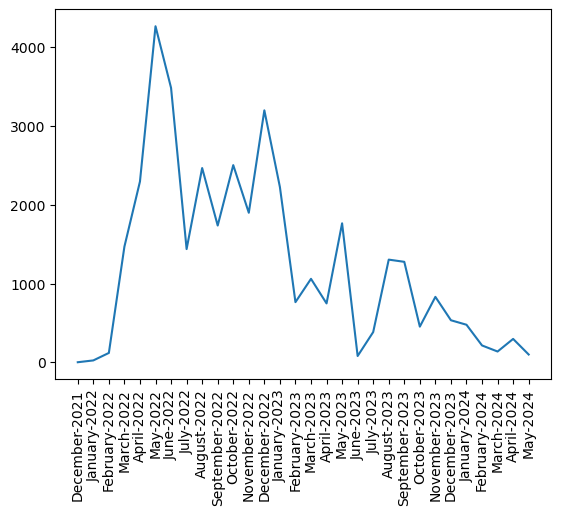

In [80]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [81]:
df['only_date'] = df['date'].dt.date

In [84]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

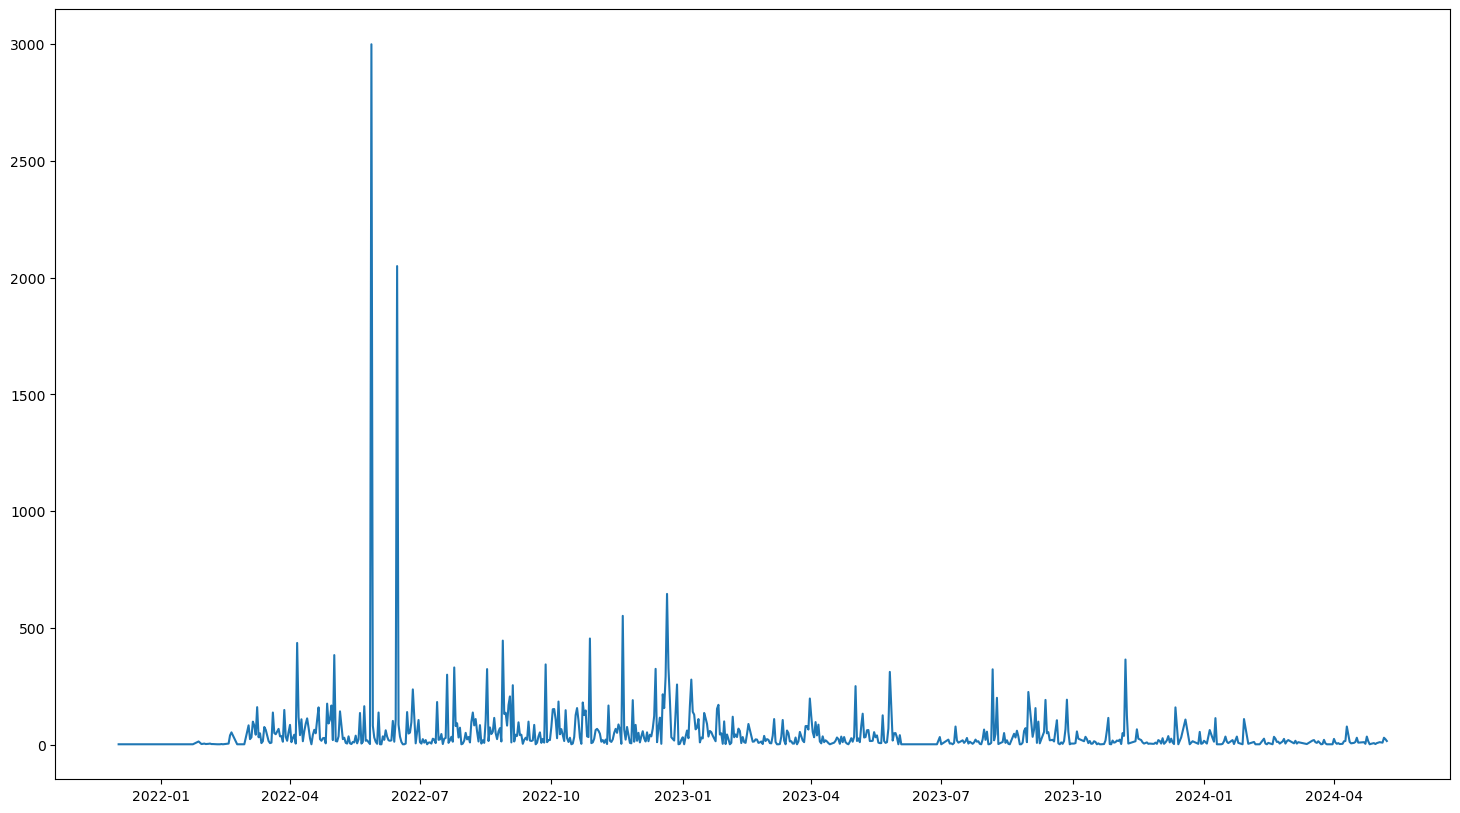

In [85]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [86]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2021-12-02 13:14:00,group_notification,- Messages and calls are end-to-end encrypted...,2021,December,2,13,14,12,2021-12-02
1,2022-01-22 18:37:00,group_notification,- +91 83681 25463 updated the message timer. ...,2022,January,22,18,37,1,2022-01-22
2,2022-01-23 19:57:00,group_notification,- +91 93062 05958 joined using this group's i...,2022,January,23,19,57,1,2022-01-23
3,2022-01-27 22:25:00,group_notification,- +91 93105 69317 updated the message timer. ...,2022,January,27,22,25,1,2022-01-27
4,2022-01-27 22:25:00,group_notification,- +91 93105 69317 turned off disappearing mes...,2022,January,27,22,25,1,2022-01-27


In [87]:
df['day_name'] = df['date'].dt.day_name()
df['day_name'].value_counts()

day_name
Wednesday    8257
Tuesday      5719
Saturday     5264
Sunday       5033
Thursday     4788
Monday       4589
Friday       3906
Name: count, dtype: int64

In [91]:
period = []

for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [92]:
df['period'] = period

In [94]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
36683,2024-01-24 12:41:00,- Disha CSDS,Roll no.\n,2024,January,24,12,41,1,2024-01-24,Wednesday,12-13
34647,2023-10-10 15:32:00,- +91 75629 46167,<Media omitted>\n,2023,October,10,15,32,10,2023-10-10,Tuesday,15-16
22771,2022-12-18 18:48:00,- Panauti,Aapka Ronaldo out of form hai\n,2022,December,18,18,48,12,2022-12-18,Sunday,18-19
29919,2023-05-02 23:26:00,- Gautam CSDS,Tu phd de\n,2023,May,2,23,26,5,2023-05-02,Tuesday,23-00
7108,2022-05-28 11:32:00,- Dipnshu Mrwl CSDS,<Media omitted>\n,2022,May,28,11,32,5,2022-05-28,Saturday,11-12


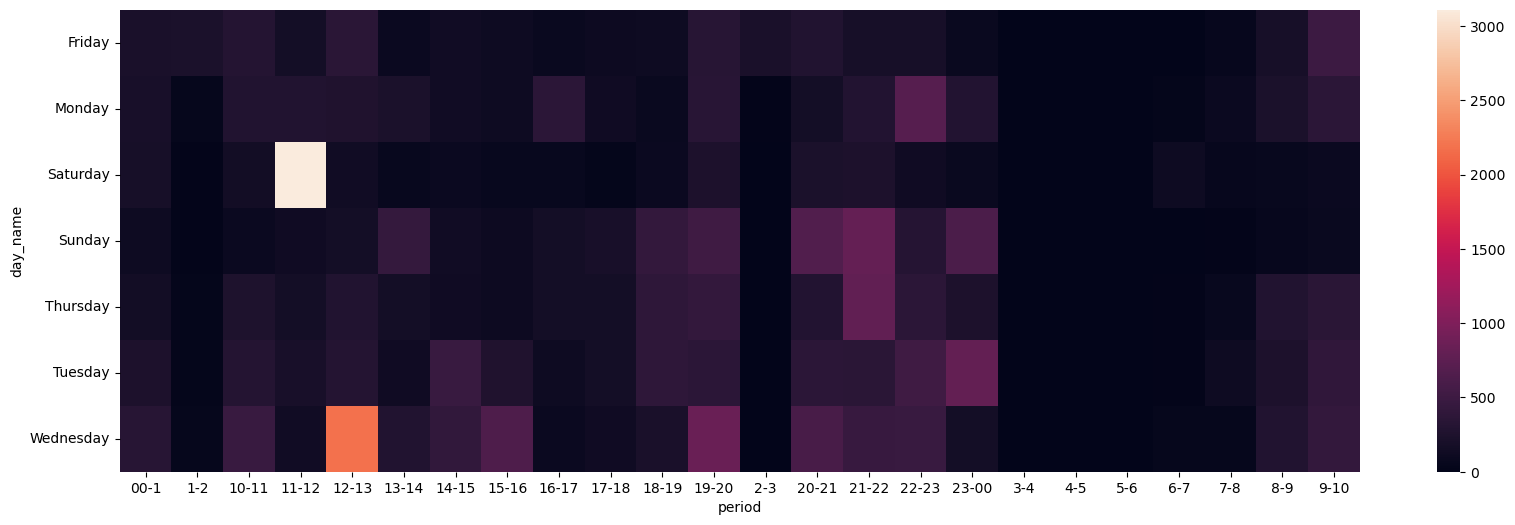

In [96]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns = 'period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()